In [11]:
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from anova import anova_table
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [13]:
# Get the data
data = pd.read_csv("~/dev/interpretable-ml-book/datasets/hand_height/handheight.txt", sep="\t")
data = data[['Height','HandSpan']]
x = np.row_stack([data['HandSpan'].to_numpy().shape[0] * [1], data['HandSpan'].to_numpy()]).T
y = data['Height'].to_numpy()
N = len(data)

predict height by hand span


# Assumptions

Linear relationship: is reasonable: The residuals "bounce randomly" around the residual = 0 line
Equal error variances: "horizontal band" around the residual = 0 line.
No outliers: No one residual "stands out"


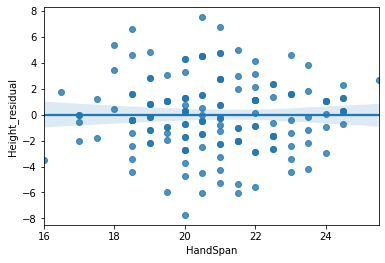

In [27]:
slope, intercept, R, p, se = sp.stats.linregress(data['HandSpan'], data['Height'])

data['Height_predict'] = slope * data['HandSpan'] + intercept
data['Height_residual'] = data['Height'] - data['Height_predict']

# bloodpress_df[f'{col}_residual'] = bloodpress_df['BP'] - bloodpress_df[f'{col}_pred']
sns.regplot(x="HandSpan", y="Height_residual", data=data)
slope, intercept, R, p, se = sp.stats.linregress(data['HandSpan'], data['Height'])
adj_R = 1-(1-R**2)*(N-1)/(N-2) 

# print(f'Weight_Age_residual: R-squared adjusted: {round(adj_R,2)}')
print('Linear relationship: is reasonable: The residuals "bounce randomly" around the residual = 0 line\n\
Equal error variances: "horizontal band" around the residual = 0 line.\n\
No outliers: No one residual "stands out"')


# Statistics

predict height by hand span


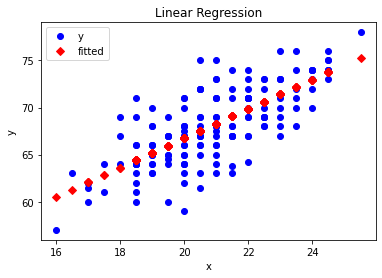


***********************************************************************************************

The model statistics:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     199.2
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           3.60e-30
Time:                        16:00:49   Log-Likelihood:                -404.55
No. Observations:                 167   AIC:                             813.1
Df Residuals:                     165   BIC:                             819.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [15]:
print('predict height by hand span')
anova_table(x, y,plot_graph=True, x_plot_loc=-1)